<a href="https://colab.research.google.com/github/zaku2590/classGCI/blob/main/GCI2025S_%E7%AC%AC3%E5%9B%9E_Python%E3%81%AB%E3%82%88%E3%82%8B%E7%A7%91%E5%AD%A6%E8%A8%88%E7%AE%97%EF%BC%88NumPy%EF%BC%89_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3回 Pythonによる科学計算（NumPy）

今回はPythonの数値計算モジュールであるNumPyを用います。NumPyはこの講座を通して用いるので基本的な使い方を学んでいきましょう。

ただしこの章で扱うものはNumPyの氷山の一角であり、機械学習でよく使うものを扱います。

この授業で使うライブラリをインポートしておきます。詳細は後ほど解説します。

In [ ]:
import numpy as np
from numpy import random
from numpy import linalg as LA

# 1 NumPyの作法

この節からNumPyに入門していきます。

## 1.1 PythonのリストとNumPyの配列(numpy.ndarray)の違い

機械学習ではデータをベクトルとして捉え、数学的な計算(行列演算、最適化など)を通して学習をします。このベクトルや行列といったものに対する演算に対して基本的な関数が組み込まれているのがNumPyモジュールとなります。

まず、**なぜNumPyを使うのか**を知るために、Python標準の機能とNumPyを比べてみましょう。まず、以下の2つのPythonリストを考えます。

In [ ]:
a = [2, 9, 9, 7, 9, 2]
b = [3, 1, 4, 1, 5, 9]

この2つのリストを要素数が6のベクトルとして操作することを考えます。例えばこのベクトルに対して、内積やaとbの各成分の和を取ったベクトルを計算する場合、Pythonでは次のように書く必要があります。

In [ ]:
# 内積
def dot_product(a, b):
    assert len(a)==len(b) # aとbの長さが同じでないときエラーを返すようにする

    ab = 0
    for i in range(len(a)):
        ab += a[i]*b[i]

    return ab

def add_vector(a, b):
    assert len(a)==len(b) # aとbの長さが同じでないときエラーを返すようにする

    add_ab = [a[i]+b[i] for i in range(len(a))]

    return add_ab

In [ ]:
print("内積:", dot_product(a, b))
print("和:", add_vector(a, b))

内積: 121
和: [5, 10, 13, 8, 14, 11]


しかし、NumPyにはすでにこれらの関数や演算が実装されています。実際に使ってみましょう。

In [ ]:
import numpy as np # numpyをimportする

慣習として、numpyはnpと省略して使います。本講座でもそれに則ります。

NumPyでは`np.ndarray`という配列が用意されています。これはN次元配列といい、ベクトルや行列・それ以上の次元の配列(テンソル)に対して統一して用意された型です。

Pythonのリストは`np.array()`という関数を用いて簡単に`np.ndarray`に変換できます。

In [ ]:
a = np.array(a)
b = np.array(b)

print("a: ", a)
print("b: ", b)
print("type of a: ", type(a))
print("type of b: ", type(b)) # aとbの型を確認する

a:  [2 9 9 7 9 2]
b:  [3 1 4 1 5 9]
type of a:  <class 'numpy.ndarray'>
type of b:  <class 'numpy.ndarray'>


`a`と`b`の内積と要素ごとの和は次のように計算されます。

In [ ]:
print("内積:", np.dot(a, b))
print("和:", a+b)

内積: 121
和: [ 5 10 13  8 14 11]


このように、NumPyではすでに基本的な操作や関数が充実しており、Pythonでわざわざ実装しなくてよいのです。

### *Tips*
> 実は、**実行速度**の観点からもNumPyを使うメリットがあります。NumPyの内部ではC言語やFortranで記述されており、効率的なメモリ管理や、BLAS/LAPACKといった高性能な線形代数ライブラリを利用しているため、Pythonのリスト操作と比較して非常に実行速度が高速です。

## 1.2 numpy.ndarrayの基本的な演算

ここでは上で用いた`a`, `b`とは別に新しいものを使用します。`np.ndarray`に変換するのを忘れないように！

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 2, 3, 6, 0])

このセクションでは`np.ndarray`の基本的な演算を紹介していきます。

ここでNumPyの演算の多くは**ユニバーサル関数（ufunc）**として実装されています。ここでのユニバーサルな演算とは、配列の各要素に対して個別に演算を適用することを指します。実際に例を見て実感していきましょう。

### 四則演算

四則演算は、通常のPythonの数値型と同じ演算子（＋, ー, ＊, ／）を用いて計算できます。これは各要素ごとの四則演算の結果を返します（**ユニバーサル関数**）。

In [ ]:
print("和: ", a + b) #これは通常のベクトルの和と一致
print("差: ", a - b) #これは通常のベクトルの差と一致
print("積: ", a * b) #これはベクトルの各要素の積(=アダマール積)
print("商: ", a / b) #これはベクトルの各要素の商

和:  [ 3  4  6 10  5]
差:  [-1  0  0 -2  5]
積:  [ 2  4  9 24  0]
商:  [0.5        1.         1.         0.66666667        inf]


<ipython-input-9-6a8866c8e88b>:4: RuntimeWarning: divide by zero encountered in divide
  print("商: ", a / b) #これはベクトルの各要素の商


### *Tips*
>商の計算では、0による除算が発生した要素で`inf`（無限大）という値が現れています。`np.inf`はNumPyで定義された特殊な浮動小数点数で、0 で割る演算や、計算結果がオーバーフローしたときに生成されます。また、ゼロ除算が発生したことを示す警告（RuntimeWarning）が表示されています。\
>今後この講座で扱うscikit-learnなどのライブラリの一部の関数などは`np.inf`や`np.nan`（非数）が含まれているとエラーを返す関数もあります。

### 条件演算

Pythonの通常の比較演算子（`==`や`>`など）はブール値（`True`または`False`）が返ってきていました。`np.ndarray`ではどのようになるでしょうか？試してみましょう(jupyter notebookのよいところは気になったことをすぐに試せるところです)。

In [ ]:
3>5

False

In [ ]:
print("a==a: ", a==a)
print("a==b: ", a==b)
print("a>b: ", a>b)

print("a==bの型: ", type(a==b))

a==a:  [ True  True  True  True  True]
a==b:  [False  True  True False False]
a>b:  [False False False False  True]
a==bの型:  <class 'numpy.ndarray'>


なんと、`np.ndarray`に対する比較演算では、結果は単一のブール値ではなく、**各要素の比較結果を要素とするブール値の`np.ndarray`**となるのです。

そして、各要素を見てみると、対応する要素間で比較演算が行われた結果が格納されています（**これもユニバーサル関数**）。これもPythonのリストとは異なる動作です。

### その他のユニバーサルな演算，関数
他にも数学的な関数をユニバーサル関数として計算してくれるものが実装されています。以下ではその例を紹介します。ユニバーサルな関数一覧は[こちら](https://docs.pyq.jp/python/pydata/numpy/universal_function.html)を参考にしてください。

In [ ]:
print("sin: ", np.sin(a))
print("log: ", np.log(a))
print("exp: ", np.exp(a))

sin:  [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
log:  [0.         0.69314718 1.09861229 1.38629436 1.60943791]
exp:  [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]


### ブロードキャスト
`np.ndarray`のユニバーサル関数では、形状（shape）が異なる配列同士でも、**ブロードキャスト**という仕組みによって計算できる場合があります。ここでは，1次元配列(ベクトル)に対するブロードキャストを学びます。

ベクトルにはスカラー倍（実数倍）という演算が定義されています。Numpyでも同様にスカラー倍（実数倍）を行うことができます。

In [ ]:
print("3a = ", 3*a)

3a =  [ 3  6  9 12 15]


これは，次の計算をしていることと同義です。

In [ ]:
threes = np.array([3, 3, 3, 3, 3])
print("3a = ", threes*a)

3a =  [ 3  6  9 12 15]


実はNumPyでは形状の異なる2つの配列に対してユニバーサル関数による二項演算を行う場合、特定のルールに従って一方または両方の配列の形状を仮想的に拡張し、形状を揃えてから計算を行います。これをブロードキャストと呼びます。

上の例でどのようなブロードキャストが起きているか考察してみましょう。`3`は`int`型ですが、NumPyはこれを0次元配列（スカラー）`np.array(3)`として扱います。`a`（形状(5,)）とスカラー`np.array(3)`（形状()）で要素ごとの積`*`を計算するためには、形状を揃える必要があります。

この場合、まずスカラー`3`は0次元配列`np.array(3)`（形状()）として扱われます。次に、`a`の形状(5,)に合わせて、`np.array(3)`が仮想的に`np.array([3, 3, 3, 3, 3])`（形状(5,)）に拡張（ブロードキャスト）され、要素ごとの積が計算されます。

では以下の2つの1次元配列の2項演算を行った場合、どうなるでしょうか？

In [ ]:
c = np.array([1, 2, 3, 4, 5])
d = np.array([1, 2])

print(c * d)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

ここではエラーが出てしまいます。\
ブロードキャストのルールでは、次元ごとのサイズを比較し、サイズが一致するか、どちらかが1である場合にのみ計算可能です。サイズが1の次元は、もう一方の配列の対応する次元のサイズに合わせて拡張されます。この例では、最後の次元のサイズが5と2で一致せず、どちらも1ではないため、ブロードキャストできません。
<br>
<br>
<br>

●ブロードキャストの仕様\
・各次元が同じであるか、または一方の次元が 1 でなければならない。\
・1 次元は、その長さが異なる次元に合わせて繰り返し拡張される。


### 基本的な関数
Pythonのリストには`max()`や`sum()`といった組み込み関数が利用できました。`np.ndarray`に対しても同様の計算を行う関数がNumPyに用意されています。

In [ ]:
print("max: ", np.max(a))
print("sum: ", np.sum(a))
print("mean: ", np.mean(a)) # meanは平均値
print("std: ", np.std(a)) # stdは標準偏差

max:  5
sum:  15
mean:  3.0
std:  1.4142135623730951


また、Pythonのリストでは`+`演算子でリストの結合を行いますが、`np.ndarray`では`+`は要素ごとの和を計算するため、配列の結合には`np.concatenate()`や`np.r_`、`np.c_`などを使用し、次のように計算します。

In [ ]:
print("aとbの連結 (concatenate): ", np.concatenate((a, b)))
print("aとbの連結（r_）: ", np.r_[a, b])

aとbの連結 (concatenate):  [1 2 3 4 5 2 2 3 6 0]
aとbの連結（r_）:  [1 2 3 4 5 2 2 3 6 0]


In [ ]:
concat = np.r_[a, b]

In [ ]:
concat

array([1, 2, 3, 4, 5, 2, 2, 3, 6, 0])

また、1次元配列の要素数はPythonと同様に`len()`関数で取得できます。

In [ ]:
print("aの長さ: ", len(a))

aの長さ:  5


In [ ]:
print(a.shape[0])

5


最後に、`np.ndarray`をPythonのリストに変換するには`tolist()`メソッドまたは`list()`関数を用います。

In [ ]:
a_list = list(a)
print(a_list)
print(type(a_list))

a_tolist = a.tolist()
print(a_tolist)
print(type(a_tolist))

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
<class 'list'>
[1, 2, 3, 4, 5]
<class 'list'>


## 1.3 練習問題

**問1** \
(1) 1次元であなたの好きな値を要素にもつ同じ長さの`np.ndarray`を2つ作成し、`type()`関数を用いて`np.ndarray`になっていることを確認してください。\
(2) (1)で作成した2つの1次元配列に対して要素ごとの四則演算を行ってください。

In [ ]:
# (1)
# WRITE ME

In [ ]:
# (2)
# WRITE ME

**問２**\
1次元配列を入力とし、その配列をL2ノルムで規格化した配列を出力する関数を作成してください。

ここで、ベクトルのL2ノルムによる規格化とは、元のベクトルと同じ向きで、長さ（L2ノルム、つまり全要素の2乗和の平方根）が1になるようにスカラー倍することです。

このとき、NumPyの**ユニバーサル関数や基本的な演算のみ**を用いて実装してください。

In [ ]:
def normalize(a):
    # WRITE ME
    return a

# 2 NumPyのインデックス 1

このセクションでは`np.ndarray`、特に1次元配列（ベクトル）におけるインデックスを用いた要素や部分配列の取得方法を学びます。

## 2.1 インデクシングによる値の取得
Pythonのリストでは`[]`を使うことによって、任意の位置の値を取得できました。

これはNumPyの1次元配列でも同様です。

このとき、インデックスは0からスタートするので注意しましょう。

In [ ]:
a = np.array([2, 9, 9, 7, 9, 2, 4, 5, 8])

print("aの前から4番目の値はa[3]=", a[3])

aの前から4番目の値はa[3]= 7


負のインデックスはリストと同様に、末尾から数えることを意味します。先頭からのインデックスは0から始まりますが、末尾からのインデックスは-1から始まることに注意しましょう。例えば，`a`の前から4番目は`a[3]`で取得しましたが，後ろから4番目は以下のように取得します。

In [ ]:
print("aの後ろから4番目の値はa[-4]=", a[-4])

aの後ろから4番目の値はa[-4]= 2


また、PythonのリストとNumPyの1次元配列のインデクシングには違いがあります。Pythonのリストのインデックスに使用できるのは整数値と次の章で説明するスライスのみですが、NumPy配列では、インデックスとして整数のリストや配列を指定することで、複数の要素を同時に取得できます（ファンシーインデックス）。

In [ ]:
print(a[[1, 3, 0, 6]])

# 一旦別の変数に保存しておくことも可能です
ids = [1, 3, 0, 6]
print(a[ids])

[9 7 2 4]
[9 7 2 4]


## 2.2 スライシング
ここではNumPy配列のスライシングを学習します。その前に、Pythonのリストにおけるスライシングを復習しましょう。

Pythonのリストではスライシングは`start: end: step`という形式をしていました。これは，リストから取り出すインデックスを初項`start`，公差`step`の等差数列で終項が`end`未満で最大の数になるように取り出します。

In [ ]:
a = list(range(30)) # 0~29を要素にもつList
print(a[2: 15: 3])

[2, 5, 8, 11, 14]


ここで，`start`, `end`, `step`はそれぞれ省略することが可能で，省略した場合は`start=0`, `endは要素の最後まで取得する`, `step=1`となります（`step`がマイナスになると，逆向きに値を取得します）。

In [ ]:
print("startを省略した場合:", end='\t')
print(a[: 15: 3])

print("endを省略した場合:", end='\t')
print(a[2: : 3])

print("stepを省略した場合1:", end='\t')
print(a[2: 15:])
# 最後の:は省略できる
print("stepを省略した場合2:", end='\t')
print(a[2: 15])

print("stepとendを省略した場合:", end='\t')
print(a[2:])

startを省略した場合:	[0, 3, 6, 9, 12]
endを省略した場合:	[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
stepを省略した場合1:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
stepを省略した場合2:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
stepとendを省略した場合:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
print("stepがマイナスの場合:", end='\t')
print(a[15: 2: -3])

stepがマイナスの場合:	[15, 12, 9, 6, 3]


それではNumPyにおけるスライシングを見ていきましょう。実は、NumPyの1次元配列もリストとほぼ同じように`start:stop:step`でスライシングできます。

In [ ]:
a = np.arange(30) # np.arange(30)はnp.array(range(30))と等価
print(a[2: 15: 3])
print(type(a[2: 15: 3]))

[ 2  5  8 11 14]
<class 'numpy.ndarray'>


In [ ]:
print("startを省略した場合:\t", a[: 15: 3])

print("endを省略した場合:", end='\t')
print(a[2: : 3])

print("stepを省略した場合1:", end='\t')
print(a[2: 15:])
# 最後の:は省略できる
print("stepを省略した場合2:", end='\t')
print(a[2: 15])

print("stepとendを省略した場合:", end='\t')
print(a[2:])

startを省略した場合:	 [ 0  3  6  9 12]
endを省略した場合:	[ 2  5  8 11 14 17 20 23 26 29]
stepを省略した場合1:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14]
stepを省略した場合2:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14]
stepとendを省略した場合:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


In [ ]:
print("stepがマイナスの場合:", end='\t')
print(a[15: 2: -3])

stepがマイナスの場合:	[15 12  9  6  3]


## 2.3 ブールインデックス参照

ここでは、NumPyのインデックス操作の中でも非常に便利なブールインデックス参照（boolean indexing）を学習します。

1次元配列のブールインデックス参照とは次のような動作をします：
- 1次元配列のインデックスに、同じ長さを持つブール値の配列やリストを指定すると、`True`に対応する位置の要素だけを取り出した新しい1次元配列を返します。

実際に例を見てみましょう。

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8, 13, 21])

# bool値をもつListを作成
idx = [True, False, False, True, False, True, True, False]

# ブールインデックス参照
print(a[idx])

[ 1  3  8 13]


また、1.2で学んだ比較演算子と組み合わせると、次のように特定の条件を満たす要素だけを抽出できます。

In [ ]:
a % 3

array([1, 1, 2, 0, 2, 2, 1, 0])

In [ ]:
# aの要素のうち、3の倍数である要素に対応する位置をTrue、それ以外をFalseとするブール配列
idx = (a % 3 == 0) # %は余りを計算する演算子で，ユニバーサル
print("ブールインデックス:", idx)

# aのうち3の倍数となるものを取得
print("aの要素で3の倍数であるもの:", a[idx])

ブールインデックス: [False False False  True False False False  True]
aの要素で3の倍数であるもの: [ 3 21]


## 2.4 練習問題

**問1** インデキシングの基礎\
あなたが作成した任意の配列に対して，前から一番目と後ろから一番目の値を取得して表示してください。

In [ ]:
a = np.array([])
print("前から一番目の値:")

print("後ろから一番目の値:")

前から一番目の値:
後ろから一番目の値:


**問2** ブールインデックス参照 \
(1) 整数値を要素にもつNumPyの1次元配列を引数として、その配列の中から、要素が奇数であるか、または4で割って2余る数である要素のみを抽出した新しい配列を出力する関数を実装してください。\
(2) 正の整数`n`を引数として、`n`より小さい正の平方数の個数を、ブールインデックス参照を用いて求める関数を実装してください(ヒント:十分な数の正の平方数を小さい順に列挙し，その中で引数より小さいものを数える)。

In [ ]:
# (1)
def make_bool_ids(a):
    # WRITE ME
    return b # b is `np.ndarray`

In [ ]:
# 入力例
a = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
# 出力例
# np.array([1, 1, 2, 2, 3, 3, 5, 5])

In [ ]:
# (2)
def count_square(n):
    # WRITE ME
    return answer

In [ ]:
# 入力例
n = 20
# 出力例
# 20未満の正の平方数は1, 4, 9, 16
# 4

# 3 NumPyの2次元配列


この章では1次元配列からさらに発展して2次元配列を扱います。これは数学における行列と対応するものです。

この講座の機械学習部分では主に2次元配列までしか扱わないため、3次元以上についてはここでは詳しく触れませんが、1次元配列から2次元配列への拡張を理解すれば、3次元以上にも応用できます。

機械学習では、行（縦軸、axis 0）にサンプル（データ点、レコード）、列（横軸、axis 1）に特徴量（説明変数）を格納した2次元配列をデータとして扱うことがよくあります。この章で扱う内容は特に基本なのでマスターしましょう。

### 3.1 2次元配列の作成

実際に2次元配列を作成してみましょう。これも1次元配列と同じく、`np.array()`関数を用います。

**(注) 以下では、$n \times m$行列や形状$(n, m)$の配列と書く場合、$n$が行数（axis 0のサイズ）、$m$が列数（axis 1のサイズ）を指します。**

In [ ]:
# 3*2行列を作ってみる
# 3*2のListを変換する
a = np.array(
    [[1, 2],
    [3, 4],
    [5, 6]])
print(a)
print("shape: ", a.shape) # 配列aの形(shape)を表すタプルを返す

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


二次元のリストを作って`np.array()`をするのではかなり面倒です。そこで、予め1次元配列を作った上で`np.ndarray.reshape()`という関数を使って2次元配列に整形することができます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, 2)
print(a)
print("shape: ", a.shape)

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


このように、`reshape`メソッドに引数として変形後の形状（タプル）を渡すと、要素数が同じであればその形状に変形できます。ただし、`reshape`は元の配列と要素数が異なる形状には変換できません。例えば、以下のような場合はエラーを返します。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, 1) # 6個の要素を持つ配列は3*1個の要素を持つ配列に整形できない

ValueError: cannot reshape array of size 6 into shape (3,1)

また，指定するshapeのうち一つの要素を`-1`にすることで，自動で整形してくれます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, -1)
print(a)
print("shape: ", a.shape)

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(4, -1) # 要素数6は4で割り切れないためエラー

ValueError: cannot reshape array of size 6 into shape (4,newaxis)

### 四則演算

これも1次元配列の場合と同様の方法で、要素ごとの四則演算を行うことができます。ただし、`*`演算子は要素ごとの積（アダマール積）であり、数学的な行列の積とは異なることに注意してください（行列積は後述）。商も同様に要素ごとです。また、1次元配列で説明したブロードキャストも同じルールで適用されます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6]).reshape(3, -1)
b = np.array([1, 1, 2, 3, 5, 8]).reshape(3, -1)

print(a)
print(b)

print("和: ", a + b) #これは通常のベクトルの和と一致
print("差: ", a - b) #これは通常のベクトルの差と一致
print("積: ", a * b) #これはベクトルの各要素の積(=アダマール積)
print("商: ", a / b) #これはベクトルの各要素の商
print("累乗:", a**2)

[[1 2]
 [3 4]
 [5 6]]
[[1 1]
 [2 3]
 [5 8]]
和:  [[ 2  3]
 [ 5  7]
 [10 14]]
差:  [[ 0  1]
 [ 1  1]
 [ 0 -2]]
積:  [[ 1  2]
 [ 6 12]
 [25 48]]
商:  [[1.         2.        ]
 [1.5        1.33333333]
 [1.         0.75      ]]
累乗: [[ 1  4]
 [ 9 16]
 [25 36]]


### 3.2 ユニバーサル関数

1.2節ではユニバーサル関数を紹介しました。ユニバーサル関数は**要素ごと**に関数を適用するものでした。これは2次元配列に対しても同様に適用できます。

$exp(x)=e^x$

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8])
a = a.reshape(3, 2)

print(a)
print("各要素の指数関数を計算: ", np.exp(a))

[[1 1]
 [2 3]
 [5 8]]
各要素の指数関数を計算:  [[2.71828183e+00 2.71828183e+00]
 [7.38905610e+00 2.00855369e+01]
 [1.48413159e+02 2.98095799e+03]]


### 3.3 axisと集約関数

NumPyの2次元配列では、これまで行と列、あるいは縦軸と横軸と呼んできました。しかし、さらに高次元の配列になると、このような呼び方では区別が難しくなります。そこで、NumPyでは軸（次元）を`axis`と呼び、0から始まる番号で区別します。例えば2次元配列では、行方向（縦）の軸が`axis 0`、列方向（横）の軸が`axis 1`となります。

1.2節で扱った平均値`np.mean()`や最大値`np.max()`のように、配列の複数の要素から一つの値を計算する関数を**集約関数**と呼びます。これらをそのまま2次元配列に適用すると、デフォルトでは配列全体の要素に対して計算が行われます。

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8])
a = a.reshape(3, 2)

print(a)
print("最大値: ", np.max(a))

[[1 1]
 [2 3]
 [5 8]]
最大値:  8


すなわち、集約関数を`axis`引数を指定せずに適用すると、配列全体の要素に対して集約が行われ、一つの値（スカラー）を返します。この例では、$3 \times 2$行列の6個すべての要素の中から最大値を取得しています。これは`reshape`を行う前の1次元配列に対して集約関数を適用するのと同じ結果になり、配列の形状情報が失われていると見なせます。

しかし、実際のデータ分析では、特定の軸に沿って集約を行いたい場合が多くあります。
次の例を考えてみましょう。

今から考える2次元配列には4人の生徒の3回分の数学のテストの点数を格納することにします。このとき、`axis 0`が生徒（4人）、`axis 1`がテストの回（3回）に対応する`shape=(4, 3)`の2次元配列を考えます（点数は適当です）：

In [ ]:
a = np.array([88, 78, 76, 98, 88, 100, 64, 78, 77, 89, 67, 78]).reshape(4, 3)
print(a)

[[ 88  78  76]
 [ 98  88 100]
 [ 64  78  77]
 [ 89  67  78]]


In [ ]:
np.max(a)

np.int64(100)

このデータに対して、全体の最高点を求めるには先ほどと同じ方法で良いですが、そのほかにも「①各テストにおける最高点」「②各生徒の最高点」を求めたくなるはずです。そこで、多くのNumPy集約関数には`axis`という引数があり、集約を行いたい軸を指定することができます。

In [ ]:
print("①: ", np.max(a, axis=0))
print("②: ", np.max(a, axis=1))

①:  [ 98  88 100]
②:  [ 88 100  78  89]


`axis`を指定して集約を行うと、指定した軸が縮約されるため、返り値の配列の次元数が1つ減ります（この例では1次元配列になります）。場合によっては、元の配列と同じ次元数を保ったまま結果を得たいことがあります。その場合は、引数`keepdims`に`True`を指定します。この結果を見ると、集約された軸のサイズが1になり、元の配列と同じ次元数が保たれているため、**各axisの意味（生徒、テスト回）が変わらない**ことがわかります。

In [ ]:
print("①: ", np.max(a, axis=0, keepdims=True))
print("②: ", np.max(a, axis=1, keepdims=True))

①:  [[ 98  88 100]]
②:  [[ 88]
 [100]
 [ 78]
 [ 89]]


### 3.4 練習問題

**問1**
(1) 5人の生徒の4回分のテスト結果（100点満点）を要素とするNumPy 2次元配列を作成してください。\
このとき、axis 0を生徒でaxis 1をテストの各回だとします。また、値は任意であるとします。

(2) それぞれの生徒の4回分のテスト結果の最高点・最低点・平均・分散をそれぞれ計算してください。\
その結果を、`axis 0`が生徒、`axis 1`が集約結果（最高点、最低点、平均、分散の順）となる`shape=(5, 4)`の2次元配列にしてください。

(3) 各テストの点数について、その点数とその生徒の平均点との差の絶対値を計算し、`shape=(5, 4)`の2次元配列としてください。

In [ ]:
# (1)

In [ ]:
# (2)

In [ ]:
# (3)

# 4 NumPyのインデックス 2

この章では2次元配列のインデックス操作を学びます。

### 4.1 基本

In [ ]:
a_list = [[1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 1, 2, 3]]
a = np.array(a_list)

# 0行目を取得
print("a_list[0]=", a_list[0])
print("a[0]=", a[0])

# (0, 1)成分を取得
print("a_list[0][1]=", a_list[0][1])
print("a[0][1]=", a[0][1])

a_list[0]= [1, 2, 3, 4]
a[0]= [1 2 3 4]
a_list[0][1]= 2
a[0][1]= 2


このように、基本的な行の取得や要素へのアクセスは、リストのリストとNumPyの2次元配列で同様に行えます。また、Numpyの配列ではIndexを`a[axis 0, axis 1]`のように1つの`[]`で書くことができます。

In [ ]:
# a[0][1]とa[0, 1]は同じ
print("a[0][1]=", a[0][1])
print("a[0, 1]=", a[0, 1])

a[0][1]= 2
a[0, 1]= 2


また、1次元配列と同様に、各軸のインデックスに対してリストや配列を指定するファンシーインデックスも利用できます。

In [ ]:
# axis 0の0番目と2番目を取得する
print(a[[0, 2]]) # a[0, 2]とは異なる

[[1 2 3 4]
 [9 1 2 3]]


In [ ]:
# axis 1の0番目と2番目を取得
print(a[:, [0, 2]]) # : の意味はこの節の後で説明します

[[1 3]
 [5 7]
 [9 2]]


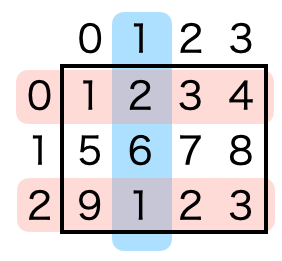

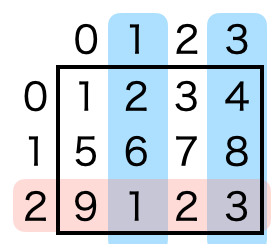

In [ ]:
# 上図
# axis 1のインデックスが1に固定されているとき，a[0, 1]とa[2, 1]は次のように取れる
print(a[[[0],
         [2]], 1]) # このとき，axis 0に指定するListや配列はaxis 0と同じ向き(縦向き)にする
print(a[[0, 2], 1])

#下図
# axis 0のインデックスが2に固定されているとき，a[2, 1]とa[2, 3]は次のように取れる
print(a[2, [[1, 3]]]) # このとき，axis 1に指定するListや配列はaxis 1と同じ向き(横向き)にする

[[2]
 [1]]
[2 1]
[[1 3]]


では、次のように、各軸から複数ずつ取ってくる(=小行列を取ってくる)場合はどのように書くでしょうか？

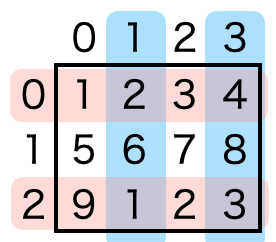

さっきと同じように各axisにリストや1次元配列を指定すれば良いです。

In [ ]:
print(a[[[0], [2]], [[1, 3]]]) # このとき，axis 0に指定するListや配列はaxis 0と同じ向き(縦向き)にする

[[2 4]
 [1 3]]


In [ ]:
print(a[[0, 2], [1, 3]]) # こうしてしまうと，a[0, 1], a[2, 3]を取得してしまう

[2 3]


ここで、`a[[[0], [2]], [[1, 3]]]` のようなブロードキャストを利用したインデックス指定は、読みにくく、入力の手間もかかります。
そこで、行インデックスのリスト `[0, 2]` と列インデックスのリスト `[1, 3]` を引数に与えると、ブロードキャスト可能なインデックスのタプル `(array([[0], [2]]), array([[1, 3]]))` を生成するヘルパー関数 `np.ix_()` があります。

In [ ]:
# 以下の2つは同じ
idx = np.ix_([0, 2], [1, 3])
print(a[idx])
print(a[[[0], [2]], [1, 3]])

[[2 4]
 [1 3]]
[[2 4]
 [1 3]]


### 4.2 スライシング

2次元配列でも、各軸に対してスライスを使うことができます。スライスは`start:stop:step`と表しますが、その軸のすべての要素を選択する場合は `:` と記述します。

In [ ]:
# aの0行目から1行目までを取り出す
# すなわち， axis 0の選択はスライスで書くと「 0:2 」で，axis 1での選択はスライスで書くと「 : 」となる
print(a[0:2])

[[1 2 3 4]
 [5 6 7 8]]


In [ ]:
# aの0列目から2列目までを取り出す
# すなわち， axis 0の選択はスライスで書くと「 : 」で，axis 1での選択はスライスで書くと「 0: 3 」となる
print(a[:, 0: 3])

[[1 2 3]
 [5 6 7]
 [9 1 2]]


In [ ]:
# aの0行目から1行目かつ0列目から2列目を取り出す
# すなわち， axis 0の選択はスライスで書くと「 0: 2 」で，axis 1での選択はスライスで書くと「 0: 3 」となる
print(a[0: 2, 0: 3])

[[1 2 3]
 [5 6 7]]


### 4.3 ブールインデックス参照

2次元配列でも、インデックスに同じ形状を持つブール値の配列を指定することで、`True`に対応する要素を1次元配列として抜き出すことができます。このとき、インデックスとして使うブール配列は、元の配列と**同じ形状（shape）**でなければなりません。

In [ ]:
a = np.array([2, 2, 3, 6, 0, 6, 7, 9]).reshape(2, 4)

print("a: ", a)
# aのうち3の倍数である値を抜き出す
idx = a%3 == 0
print("ブールインデックス: \n", idx)
print(type(idx))
print(a[idx])# 結果は1次元配列

a:  [[2 2 3 6]
 [0 6 7 9]]
ブールインデックス: 
 [[False False  True  True]
 [ True  True False  True]]
<class 'numpy.ndarray'>
[3 6 0 6 9]


また、特定の軸(axis)に対してのみブールインデックス（またはスライスや整数配列と組み合わせる）を指定することもできます。

In [ ]:
print(a[:, [False, True, False, True]]) # axis 1にブールインデックスを指定

[[2 6]
 [6 9]]


4.1でやったように、2つのaxisにブールインデックスを指定して交差した部分を得るには`np.ix_()`関数が使えます。

In [ ]:
print(a[np.ix_([True, True], [True, True, False, True])])

[[2 2 6]
 [0 6 9]]


### 4.4 練習問題

**問1**\
(1) 0~99までの100個の連続整数を値にもつ1次元の`np.ndarray`を作成し、shapeが`(10, 10)`の2次元配列となるように整形してください。\
(2) (1)の配列から偶数行目を抜き出したshapeが`(5, 10)`の2次元配列を作成してください。ただし行は0から数えます。\
(3) (1)の配列から奇数列目を抜き出したshapeが`(10, 5)`の2次元配列を作成してください。ただし列は0から数えます。\
(4) (1)の配列から、偶数行目かつ奇数列目にある値を要素にもつshapeが`(5, 5)`の2次元配列を作成してください。ただし行と列は0から数えます。

# 5 NumPyの発展

### 5.1 科学定数
NumPyでは、$\pi$ (`np.pi`) や $e$ (`np.e`) といった数学定数や、無限大を表す `np.inf`、非数（Not a Number）を表す `np.nan` などが定義されています。

In [ ]:
print("円周率: ", np.pi)
print("ネイピア数: ", np.e)

円周率:  3.141592653589793
ネイピア数:  2.718281828459045


In [ ]:
print("正の無限大: ", np.inf)
print("負の無限大: ", - np.inf)

正の無限大:  inf
負の無限大:  -inf


`np.inf`は四則演算で次のような性質を持ちます。

In [ ]:
print(1 + np.inf)
print(1 - np.inf)
print(2 * np.inf)
print(2 / np.inf)

inf
-inf
inf
0.0


また，条件演算では`a`の値によらず次の性質を持ちます。

In [ ]:
a = 10000000
print(a < np.inf)
print(- np.inf < a)

True
True


### 5.2 乱数を値にもつNumpyの配列

NumPyには乱数を生成するためのサブモジュール `numpy.random` があり、乱数を要素とする配列を簡単に作成できます。

In [ ]:
from numpy import random

In [ ]:
# [0, 1)上の一様乱数を一つ生成.0は含むが1は含まない.
print(random.rand())

# 引数にshapeをかくとそのshapeの一様乱数が生成される
print(random.rand(5)) # 長さ5(=shapeが(5, ) )の1次元配列
print(random.rand(5, 5)) # shapeが(5, 5)の2次元配列

0.8107767680895971
[0.03514717 0.53488673 0.16650012 0.30841038 0.04506241]
[[0.23857613 0.67483453 0.78238275 0.69520163 0.32895445]
 [0.49403187 0.52412136 0.29854125 0.46310814 0.98478429]
 [0.50113492 0.39807245 0.72790532 0.86333097 0.02616954]
 [0.29001718 0.78906919 0.45711967 0.00692848 0.41933546]
 [0.33067476 0.60415213 0.32462084 0.98125108 0.58823195]]


また，`rand()`ではなく`randn()`を使うことで正規分布からサンプリングすることもできます。

In [ ]:
# 標準正規分布(平均0, 分散1)に従う乱数を一つ生成
print(random.randn())

# 引数にshapeをかくとそのshapeの乱数が生成される
print(random.randn(5)) # 長さ5(=shapeが(5, ) )の1次元配列
print(random.randn(5, 5)) # shapeが(5, 5)の2次元配列

0.06244433798388502
[-1.09812873  0.13053306 -0.18533706 -1.34073473 -0.32401968]
[[ 1.48436338  1.31308828 -0.63216401 -0.3915733  -2.3684957 ]
 [-0.59068391 -1.71300152 -1.31285141  0.4537796  -1.78332529]
 [ 1.42551583 -0.34569861  0.99865743  0.72538634 -0.9284097 ]
 [-0.67998274 -1.11262844  0.01247516 -0.52631136 -0.6795309 ]
 [ 1.45994761  1.36657358  1.70810135  0.23903042 -0.45993459]]


また，平均と標準偏差を指定したいときは`normal(mean, std, shape)`を使います。

In [ ]:
print(random.normal(100, 10)) # 平均100, 標準偏差10の正規分布に従う乱数
print(random.normal(100, 10, 5)) # 平均100, 標準偏差10の正規分布に従う乱数を5つ持つ1次元配列として作成
print(random.normal(100, 10, (5, 5)))
# 平均100, 標準偏差10の正規分布に従う乱数を値にもつshape (5, 5)の2次元配列として作成

111.58311710697322
[102.53673937 102.03742962 117.73201563 109.88609277  91.88572817]
[[ 84.76740514  96.9900552   96.09388972 104.68037148 115.13548419]
 [104.24640107 101.22346219  86.12352885  95.329589   112.7359663 ]
 [101.21721615  87.82535782 104.03288099  85.269049    91.92532067]
 [ 89.67244017 108.5284483   92.04940814 109.32159558 117.01164875]
 [101.14539813  97.19305323  88.402028   120.0774251   99.92876087]]


また，整数を乱数として生成する`randint`というものもあります。

In [ ]:
print(random.randint(4)) # 0~3の整数を生成
print(random.randint(2, 10, (3, 3))) # 2~9の整数をランダムに値にもつshape (3, 3)の2次元配列を生成

2
[[7 3 8]
 [2 7 6]
 [8 2 2]]


上の乱数の生成でしたが，毎回実行すると結果が変わっていました。しかし，再現性の観点から発生する乱数を固定したいことがあります。そこでseed(乱数の種)というものを設定するとseedが同じならば同じ乱数が生成されることがわかります。

In [ ]:
random.seed(seed=32) # seedは好きなintで良い

# 何回実行しても値は同じ
print(random.rand(5))
print(random.rand(5))
print(random.randint(2, 10, (3, 3)))

[0.85888927 0.37271115 0.55512878 0.95565655 0.7366696 ]
[0.81620514 0.10108656 0.92848807 0.60910917 0.59655344]
[[3 4 5]
 [2 4 4]
 [4 6 4]]


### 5.3 線形代数の基本的な計算

線形代数関連の計算はNumPyの重要な機能の一つです。今回は次の配列を使います。

In [ ]:
x = np.arange(1, 4)
y = np.arange(6, 9)
A = np.arange(1, 10).reshape(3, 3)
B = random.randint(1, 10, (3, 3))

print("x: ", x)
print("y: ", y)
print("A: ", A)
print("B: ", B)

x:  [1 2 3]
y:  [6 7 8]
A:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
B:  [[5 5 6]
 [7 9 5]
 [1 7 5]]


#### 転置

転置は主に2次元配列（行列）に対して定義される操作で、`np.transpose()`関数または`ndarray`オブジェクトの`.T`属性で計算できます。

In [ ]:
# 以下の二つは同じ
print(np.transpose(A))
print(A.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


#### 内積，行列積
ベクトル間の内積や行列間の行列積は、`np.dot()`関数、`np.matmul()`関数、または `@`演算子（Python 3.5以降）を用いて計算します。これらの関数/演算子は、高次元配列に対する挙動が異なりますが、ベクトルや行列に対してはほぼ同じように使えます。詳細はここでは省略します。この講座のレベルでは同じものだと思ってもらって構わないでしょう。ただし、`@`演算子はPython 3.5で導入され、NumPyなどのライブラリで行列積を表すために広く使われるようになっています。`np.matmul` と同じ動作をします。

In [ ]:
print("xとyの内積")
print(np.dot(x, y))
print(np.matmul(x, y))
print(x@y)

print("AとBの行列積")
print(np.dot(A, B))
print(np.matmul(A, B))
print(A@B)

xとyの内積
44
44
44
AとBの行列積
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]


以下では`np.matmul()`を用いていくとします。

In [ ]:
# 行列なので積の順番を変えて答えが一致するとは限らない。
print(np.matmul(A, B))
print(np.matmul(B, A))

[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 67  83  99]
 [ 78  99 120]
 [ 64  77  90]]


**ブロードキャスト**\
行列とベクトルの積などでも、ブロードキャストが適用される場合があります。以下の例を見てみましょう。

$y=Ax$

In [ ]:
# ブロードキャストの簡単な例
print(np.matmul(A, x)) # xは縦ベクトルとして解釈される
print(np.matmul(x, A)) # xは横ベクトルとして解釈される

[14 32 50]
[30 36 42]


### *Tips*
>ベクトル(1次元配列)において縦ベクトルと横ベクトルを区別したい時が多いので，実際には1次元配列ではなく2次元配列として扱うと便利なことが多いです。例えば，5次元ベクトルを扱うのにshape (5, )の1次元配列ではなくshape (5, 1)の2次元配列とすることによって転置などの操作が可能になります。

In [ ]:
# Tips

a = np.array([1, 0, 1, 0, 1])# 5次元ベクトルを表す1次元配列

# 転置をする前後で変わらない(axisが一つしかないため)
print("転置前: ", a)
print("転置後: ", a.T)

# 2次元配列にすると縦ベクトルと横ベクトルが区別できて，わかりやすいことがある

# aを横ベクトルの2次元配列にする
a = a.reshape(1, -1) # axisを-1にすると要素数を自動で計算してくれる
print("転置前: ", a)
print("転置後:\n ", a.T)

転置前:  [1 0 1 0 1]
転置後:  [1 0 1 0 1]
転置前:  [[1 0 1 0 1]]
転置後:
  [[1]
 [0]
 [1]
 [0]
 [1]]


#### 線形代数計算ライブラリlinalg

NumPyは線形代数に関する様々な計算を行うためのサブモジュール `numpy.linalg` を提供しています。

In [ ]:
from numpy import linalg as LA

`linalg` モジュールの基本的な関数を紹介します。

In [ ]:
# 行列式を求める
print(LA.det(A))
print(LA.det(B))

# 逆行列を求める
print(LA.inv(B)) # Aはdet(A)=0のため非正則行列であり、逆行列を求めようとするとLinAlgErrorが出る

0.0
139.99999999999994
[[ 0.07142857  0.12142857 -0.20714286]
 [-0.21428571  0.13571429  0.12142857]
 [ 0.28571429 -0.21428571  0.07142857]]


In [ ]:
# ノルムを求める
# デフォルトではL2ノルム
print(LA.norm(x))
print(LA.norm(y))

# ordという引数を指定するとLpノルムに対応
print(LA.norm(x, ord=1))
print(LA.norm(y, ord=np.inf)) # ordにnp.infを指定するときちんとL∞ノルムになっている

3.7416573867739413
12.206555615733702
6.0
8.0


また，この`LA.norm()`関数は集約関数であり，2次元以上の配列を指定すると`axis`を指定することができます。`keepdims`をTrueにすると形状を保ちます。

In [ ]:
print("A:")
print(A)

print()
print("keepdims=False(デフォルト)")
print("axis=0", LA.norm(A, axis=0))
print("axis=1", LA.norm(A, axis=1))

print()
print("keepdims=True")
print("axis=0")
print(LA.norm(A, axis=0, keepdims=True))
print("axis=1")
print(LA.norm(A, axis=1, keepdims=True))

A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

keepdims=False(デフォルト)
axis=0 [ 8.1240384   9.64365076 11.22497216]
axis=1 [ 3.74165739  8.77496439 13.92838828]

keepdims=True
axis=0
[[ 8.1240384   9.64365076 11.22497216]]
axis=1
[[ 3.74165739]
 [ 8.77496439]
 [13.92838828]]


他にもlinalgには固有値や特異値を求めたり，特異値分解やLU分解をはじめとした行列の各種標準形を求めることもできます。

# 6 Numpyの学習の仕方

今回，たくさんのNumpyの機能を紹介してきましたが，これはあくまで氷山の一角です。今日扱った内容を含めて，どの程度まで覚える必要があるのでしょうか？

この節では，Numpyとの上手な付き合い方について解説していきます。ここに書いてあることは今後この講座で扱う全てのライブラリに共通することです。特に，Pythonプログラミング初心者に学習の道標を掲げていきたいと思います。

### 6.1 プログラミングの調べ方

まず、NumPyの機能についてどこまで覚える必要があるのか？ということですが、これに関しては自分から覚えるべきことは少ないと思っています。特に，今回の講義だと、1次元、2次元配列の基本的な扱い方を覚えるだけで十分で、他の機能については、**必要になったときにその都度調べればよい**のです。そうすることで、自然とよく使うものは覚え、滅多に使わない機能まで無理に暗記する必要がなくなります。実際、経験豊富なエンジニアでも、普段使わない機能についてはその都度ドキュメントなどを調べて確認します。

では、実装したい機能があったときにどのように調べれば良いのでしょうか？今回は、NumPyの1次元配列を降順（大きい順）にソートするという操作が必要になった状況を仮定して、調べる手順を見てみましょう。

**手順①** やりたいことの言語化
>例: Numpyの配列に対してソートをしたい

**手順②** 検索エンジンで検索。このとき、「言語(or ライブラリ名) キーワード1、キーワード2, ...」\
日本語で検索すると日本語の解説記事が出てきます。
>例: 「numpy 配列 ソート」で検索をする

また、今後エンジニアになりたい人は英語で入力して公式のレファレンスで検索するということを癖づけましょう。これは、いずれあるレベルに達したときに日本語の記事での解説がなかったり誤っていたりすることが少なくないためです。
>例: numpyの[公式リファレンス](https://docs.scipy.org/doc/numpy/reference/)内で「ndarray sort」で検索

**手順③** 公式リファレンスをみた場合，引数と戻り値とその定義を確認する\
ここで、自分の実装したい機能が作れそうかわかります。また、多くの場合`example`を載せてくれているのでそこも参考にできます。
>例: 公式リファレンスを見ると，いくつか[検索結果](https://docs.scipy.org/doc/numpy/search.html?q=ndarray+sort)が出てきます。一番上のnumpy.ndarray.sortを見ると、ソートするaxisを指定したり、ソートアルゴリズムを選択したりできるようだ。また、`Sort an array in-place. `と書いてあるので、ソート後の配列を出力するわけではなく実行するだけで元の配列がソートされることもわかる。

以上の手順で、目的の操作を行う関数や方法を見つけることができます。しかし、公式のリファレンスを見るとソートの際は小さい順に並べられて，大きい順にならべるように指定するような引数がないことがすぐにわかるため、小さい順に並べた後、自分で逆順にすればいいということがわかりました。

In [ ]:
a = random.randint(1, 100, (5,))
print(a)

# 小さい順に並べ替え
a.sort() # 実行するだけでaがsortされる
# a_sorted = a.sort() これは間違い。a.sort()は何も返さないのでNoneになる。
print(a)

# スライスを使って逆順にする
print(a[: : -1])

[63 31 81 84 51]
[31 51 63 81 84]
[84 81 63 51 31]


ある程度慣れてくると、どういうキーワードで計算すれば目的のものに辿り着けるのかわかってくるようになります。また，公式のリファレンスを読んで理解して使うことで，よく使うものは自然に覚えるようになります(日本語の解説記事を毎回コピペしていてはそうはなれません)。

### 6.2 練習問題

**問1**\
(1) 1次元配列に対して、最大値のインデックスを取得する関数を自分で調べて、実行してください。\
(2) 2次元配列のaxis 1の方向で各最大値のインデックスを取得してください。その際次元を保持するようにして下さい。\
(3) 2次元配列の最大値のインデックスの場所が何行何列目かを取得する操作を自分で調べて実装してください。

In [ ]:
# (1)

# (2)

# (3)

In [ ]:
#(1)
#入力例
a = np.array([3, 8, 2, 6, 4, 4])
# 出力例
# 1

#(2)
# 入力例
a = np.array([3, 8, 2, 6, 4, 4]).reshape(2, 3)
# 出力例
# [[1],
#[0]]

#(3)
# 入力例
a = np.array([3, 8, 2, 6, 4, 4]).reshape(2, 3)
# 最大値8は(0, 1)成分にある
# 出力例
# (0, 1)